# ***Transformation of Features***

Transformation of Features are required because :

* It is possible that the unprocessed raw data at first instance will lead to poor interpretation because of the effects of systematic variations. A suitable transformation or standardization or normalization can nullify the effect of such variations.
* There are some algorithms like linear regression in which we use gradient descent and in order to derive the best fit line we need to normalize or standardize the data.
* Every Point has some vectors and if these vector are not scaled down then gradient descent or Euclidean distance take much larger time to converge. 

***Different Techniques of Transformation:***

1. Normalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quartile values
4. Guassian Transformation:
    * Logarithmic Transformation
    * Reciprocal Transformation
    * Square Root Transformation
    * Exponential Transformation
    * Box-Cox Transformation 

## ***1. Normalization and Standardization***

### ***Standard Scaling:***
* We try to bring all the variables or features to a similar scale.
* Standardization means centering the variable at zero.
* Also known as Z-score normalization.
* All the features will be transformed in such a way that they will have the property of standard normal distribution with mean=0 and standard deviation=1.
* Formula: 
 $$z=\frac{x-\mu}{\sigma}$$

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived','Pclass'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
data.Age.fillna(data.Age.median(),inplace=True)

In [4]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
# We use the StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler

* The fit() method is calculating the mean and variance of each of the features present in our data. The transform() method is transforming all the features using the respective mean and variance.
* fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
* We want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.

***we use fit_transform() on training data but transform() on the test data***

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)


In [9]:
df_scaled = pd.DataFrame(df_scaled,columns=data.columns)

In [10]:
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

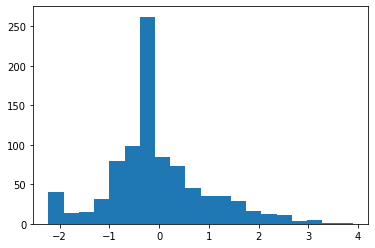

In [12]:
plt.hist(df_scaled['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

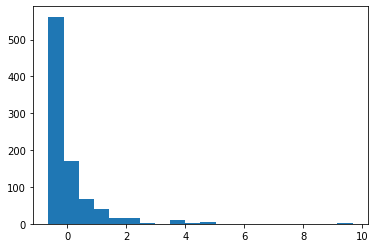

In [13]:
plt.hist(df_scaled['Fare'],bins=20)

## ***2. Scaling to Minimum and Maximum values***
### ***MinMax Scaling***
* Min Max Scaling scales the values between 0 to 1.
* Mostly used in ANN and CNN.
* Formula:
$$x=\frac{x-min(x)}{max(x)-min(x)}$$

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(data),columns=data.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

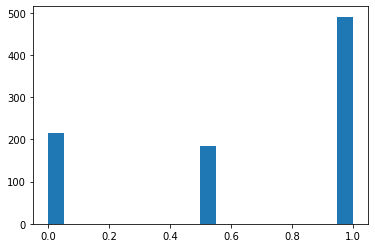

In [15]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

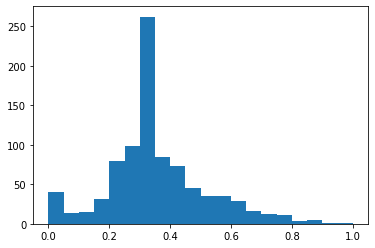

In [16]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

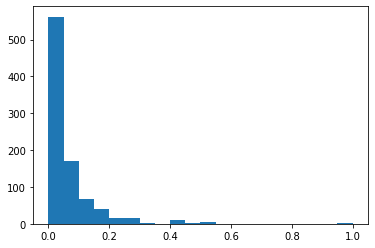

In [17]:
plt.hist(df_minmax['Fare'],bins=20)

## ***3. Scaling to Median and Quartile values***
### ***Robust Scaling:***
* Robust Scaling is used when we have outliers in our data.
* Robust Scaling is used to scale features to median and quartile values.
* This technique removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and 3rd quartile (75th quantile).
* Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile.
* Formula:
$$x=\frac{x-median(x)}{IQR}$$
where $$IQR=Q3-Q1$$

In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [19]:
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

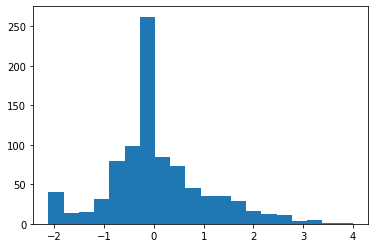

In [20]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

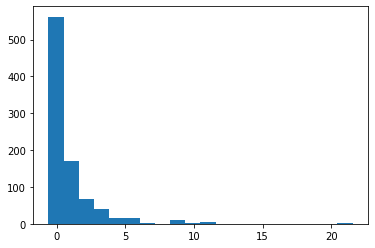

In [21]:
plt.hist(df_robust_scaler['Fare'],bins=20)

## ***4. Guassian Transformation:***
* We can use it to check whether the data belongs to Guassian distributed or not.
* If our distribution is not Guassian distribution or normal distribution then we can apply some mathematical equations to make it Guassian distribution. For example = **Fare** which is right skewed we can convert it into normal distribution by using different techniques.

### ***4.1 Logarithmic Transformation:***
* Log Transformation is primarily used to convert a skewed distribution into a normal distribution/less-skewed distribution.
* In this transform, we take the log of the values in a column and use these values as the column instead.
* Log operation has dual roles:
    * Reducing the impact of too-low values.
    * Reducing the impact of too-high values.
* Formula:
$$x=\log(x)$$

In [24]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [25]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
data.Age.fillna(data.Age.median(),inplace=True)

In [27]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [29]:
# If we want to check whether the feature is guassian or normal distributed we use Q-Q plot
import scipy.stats as stats
import pylab

def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].plot.hist(bins=20)
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist=stats.norm,plot=pylab)
    plt.show()

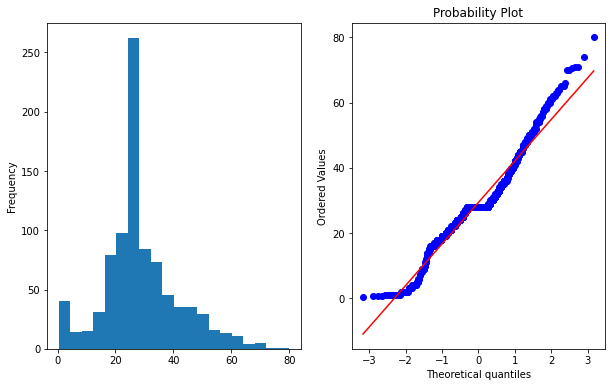

In [30]:
plot_data(data,'Age')

In probability plot, if all the points falling in the straight line then we can say, that feature is normally distributed.

From above observation our 'AGE' feature is normally distributed.

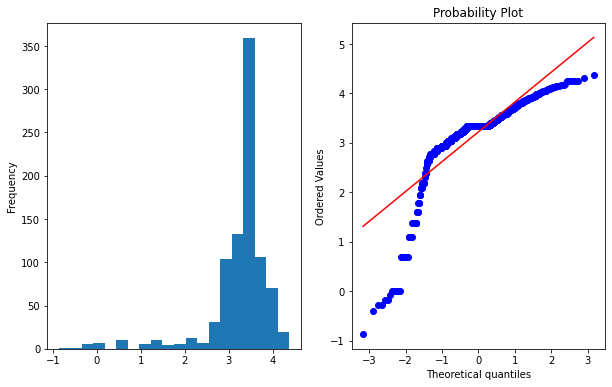

In [31]:
# Let's do transformation and check whether what we are stated above is correct or not
# To do so we use Logarithmic transformation
data['Age_log'] = np.log(data['Age'])
plot_data(data,'Age_log')

By applying log transformation we make our data left skewed because:
1. Logarithmic transformation is used when data is skewed and our 'Age' feature was not skewed before the transformation.
2. Our 'Age' feature was already normally distributed.

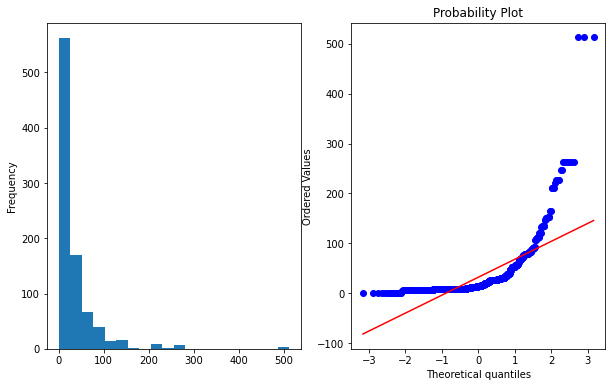

In [33]:
# Let's check for the "Fare" feature
plot_data(data,'Fare')

We can see that the 'Fare' feature is right skewed means we can apply log transformation on it and make it normally distributed.

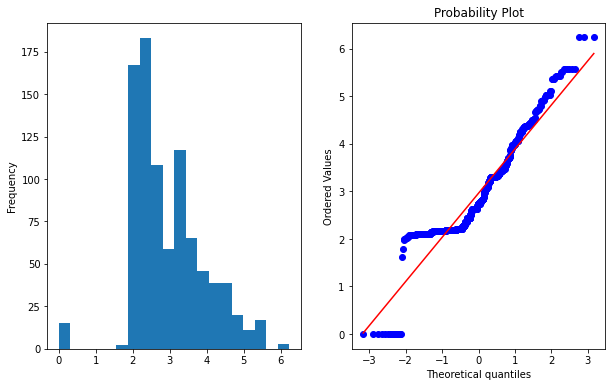

In [56]:
# def plot_Fare(data,feature):
#     plt.figure(figsize=(10,6))
#     plt.subplot(1,2,1)
#     plt.hist(data[np.isfinite(data[feature])][feature],bins=20)
#     plt.subplot(1,2,2)
#     stats.probplot(data[feature],dist=stats.norm,plot=pylab)
#     plt.show()

data['Fare_log'] = np.log1p(data['Fare'])
plot_data(data,'Fare_log')

***Here we can see, by applying Logarithmic Transformation on 'Fare' feature we make it normally distributed.***

### ***4.2 Reciprocal Transformation:***
* In this transformation, x will replace by the inverse of x (1/x).
* The reciprocal transformation will give little effect on the shape of the distribution. This transformation can be only used for non-zero values.
* The skewness for the transformed data is increased.
* Formula:
$$x=\frac{1}{x}$$

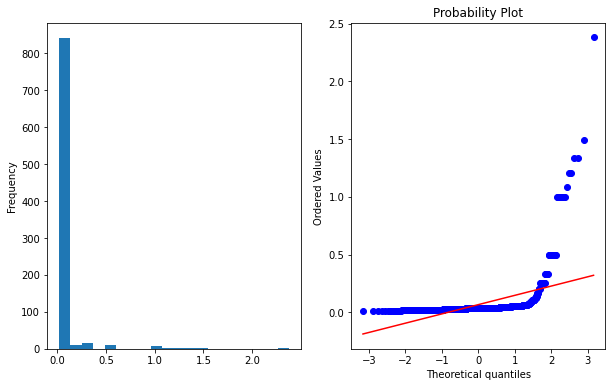

In [48]:
data['Age_reciprocal'] = 1/data['Age']
plot_data(data,'Age_reciprocal')

By doing reciprocal of Age feature, it become more right skewed i.e. reciprocal transformation is not favourable for Age feature.

### ***4.3 Square Root Transformation:***
* This transformation will give a moderate effect on distribution. The main advantage of square root transformation is, it can be applied to zero values.
* Here the x will replace by the square root(x). 
* It is weaker than the Log Transformation.
* Formula:
$$x=\sqrt{x}$$

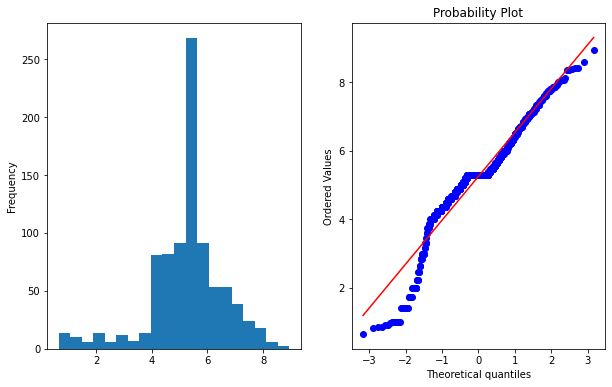

In [49]:
data['Age_sqrt'] = np.sqrt(data['Age'])
plot_data(data,'Age_sqrt')

Here we can see that the 'Age' feature is now more normally distributed i.e. we can Square Root Transformation for the 'Age' feature.

### ***4.4 Exponential Transformation:***


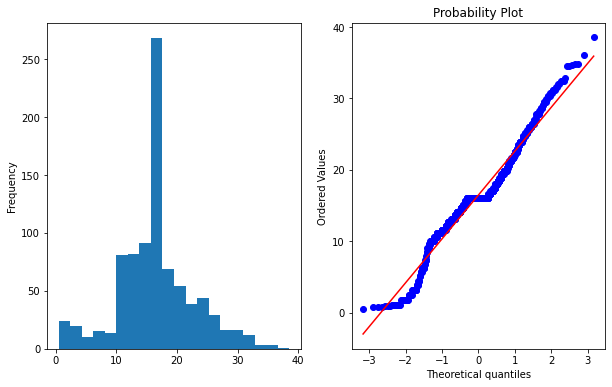

In [51]:
# data['Age_exponential'] = np.exp(data['Age']) 
data['Age_exponential'] = data.Age**(1/1.2)
plot_data(data,'Age_exponential')

### ***4.5 Box-Cox Transformation:***
* Box-cox transformation works pretty well for many data natures.
* For this transformation, values strictly to be positive.
* Formula:
$$y(\lambda)=\frac{y^{\lambda}-1}{\lambda},  if \lambda = \mathllap{/\,} 0 $$
$$y(\lambda)={log(y)},    if \lambda=0$$
* where y is the response variable and $${\lambda}$$ is the transformation parameter.
* All the values of lambda vary from -5 to 5 are considered and the best value for the data is selected. The “Best” value is one that results in the best skewness of the distribution. Log transformation will take place when we have lambda is zero.

In [53]:
data['Age_Boxcox'], parameters = stats.boxcox(data['Age'])

In [54]:
print(parameters)

0.7964531473656952


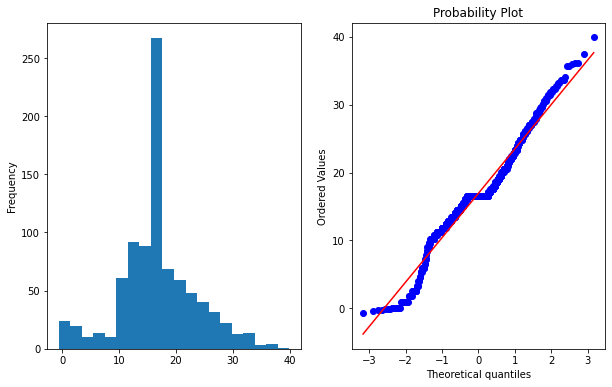

In [55]:
plot_data(data,'Age_Boxcox')

Here we can see that, Box-Cox Transformation is also suitable for Age feature and it provides more normal distribution to the 'Age' feature.

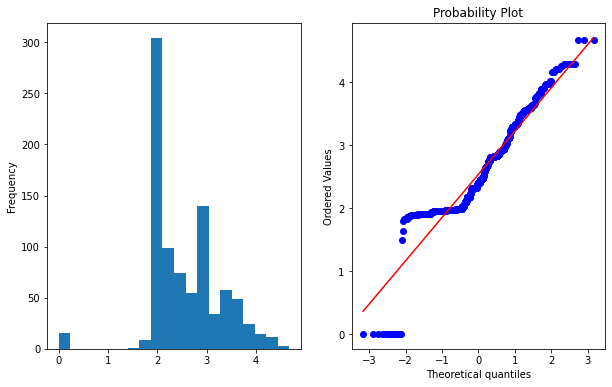

In [58]:
# Let's check BoxCox tranformation for 'Fare' feature
data['Fare_Boxcox'], parameters = stats.boxcox(data['Fare']+1) # +1 is to avoid negative values
plot_data(data,'Fare_Boxcox')